<a href="https://colab.research.google.com/github/TaniaHafsa/DIP-lab_task_1/blob/main/2019331532_CSE716_labtask_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
!pip install opencv-python-headless

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! mkdir /content/kaggle_data

In [8]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [9]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [01:32<00:00, 31.2MB/s]
100% 2.40G/2.40G [01:32<00:00, 27.8MB/s]


In [10]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

In [21]:
from skimage import io

In [22]:
image_1 = io.imread("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene31.png")

In [23]:
image_1

array([[[ 65,  77, 101],
        [ 68,  80, 103],
        [ 73,  87, 103],
        ...,
        [ 49,  51,  53],
        [ 41,  49,  46],
        [ 41,  49,  46]],

       [[ 65,  77, 101],
        [ 68,  80, 103],
        [ 70,  83,  99],
        ...,
        [ 44,  46,  48],
        [ 41,  49,  46],
        [ 41,  49,  46]],

       [[ 64,  77,  95],
        [ 63,  76,  94],
        [ 69,  86,  98],
        ...,
        [ 39,  44,  45],
        [ 40,  47,  45],
        [ 40,  47,  45]],

       ...,

       [[177, 190, 195],
        [176, 189, 194],
        [175, 188, 193],
        ...,
        [ 83,  82,  73],
        [ 85,  83,  72],
        [ 83,  80,  70]],

       [[182, 193, 199],
        [181, 192, 197],
        [180, 191, 194],
        ...,
        [ 84,  86,  76],
        [ 83,  80,  70],
        [ 77,  74,  64]],

       [[181, 192, 197],
        [182, 193, 199],
        [180, 191, 194],
        ...,
        [ 84,  86,  76],
        [ 82,  79,  69],
        [ 77,  74,  64]]

# Folder with noisy data

In [26]:
import os

In [27]:
from matplotlib import pyplot as plt
import numpy as np

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2

In [29]:
# Create a list of image paths
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene31.png"):
            txt_files.append(os.path.join(root, file))

In [30]:
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene31.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Noised/AlphaISP_2592x1536_8bits_Scene31.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene31.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene31.png


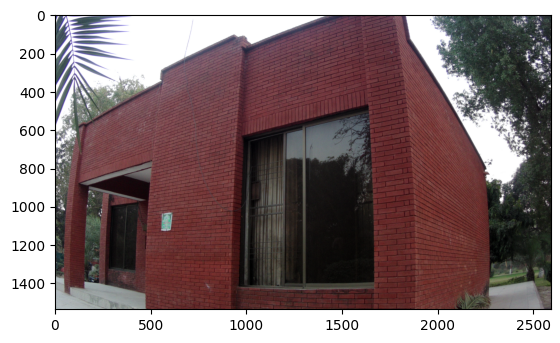

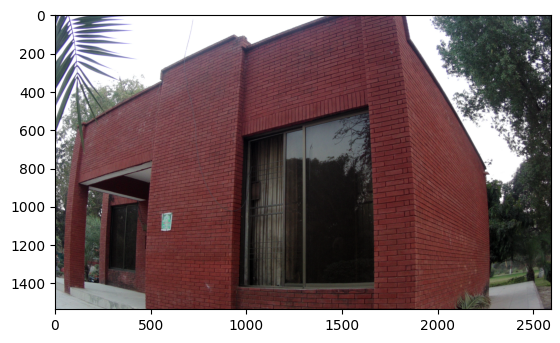

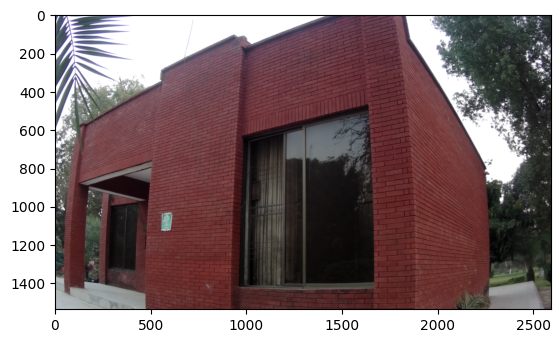

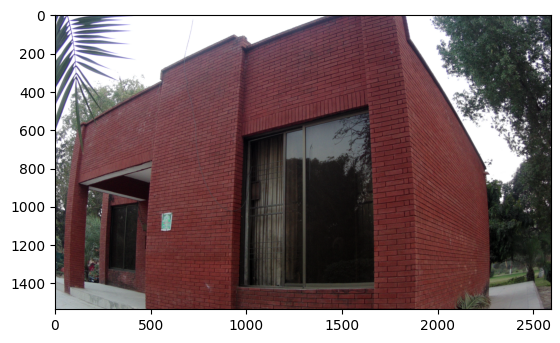

In [31]:
from skimage import io

for noisy_image in txt_files:
  print(noisy_image)
  plt.figure()
  plt.imshow(io.imread(noisy_image))
plt.show()

In [32]:
im1 = io.imread(txt_files[0])
im2= io.imread(txt_files[1])
im3= io.imread(txt_files[2])
im4= io.imread(txt_files[3])

# Doing addition

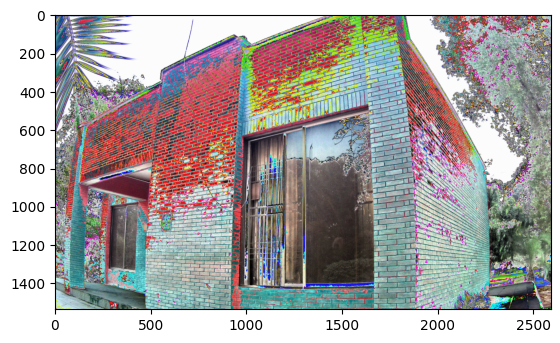

In [33]:
imsum = im1+im2+im3+im4
imsum = np.uint8(np.clip(imsum, 0, 255))
plt.figure()
plt.imshow(imsum)
plt.show()

# Noise reduction by average

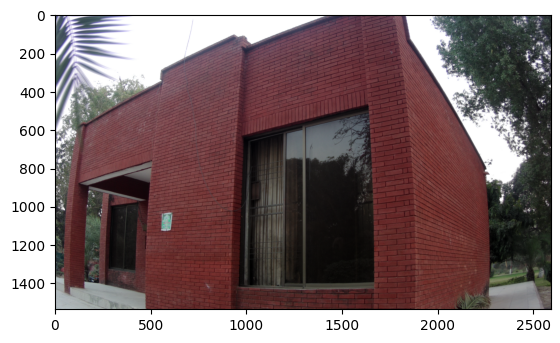

In [34]:
averim = np.mean(np.array([im1, im2, im3, im4]), axis=0)
averim = np.uint8(np.clip(averim, 0, 255))
plt.figure()
plt.imshow(averim)
plt.show()

# change detection by substraction

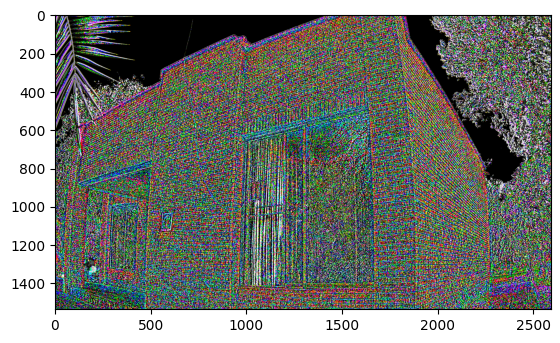

In [35]:
imsub = im3 - im1
plt.figure()
plt.imshow(imsub)
plt.show()

# masking by multiplication

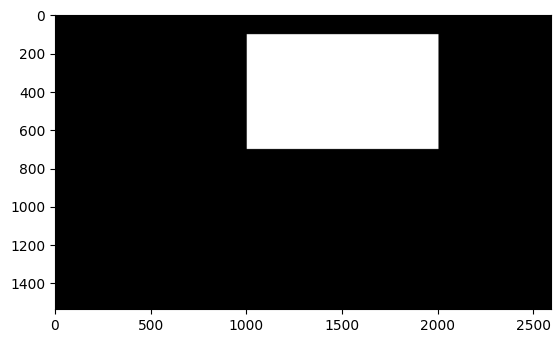

In [36]:
neim = np.zeros_like(im1)

neim[100:700, 1000:2000] = 255
# Display the new image
plt.figure()
plt.imshow(neim)
plt.show()
#set pixel to 1
neim[neim == 255] =1

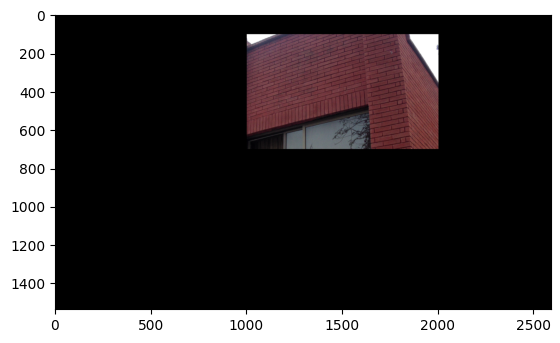

In [37]:
tryim = im1*neim
plt.figure()
plt.imshow(tryim)
plt.show()